In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import statsmodels.api as sm
import RMA

In [2]:
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['text.usetex']=True
mpl.rcParams['figure.figsize'] = (10,7.15)
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markeredgewidth'] = 0
mpl.rcParams['figure.titlesize'] = 28
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['savefig.dpi'] = 80
#mpl.rcParams['scatter.edgecolor'] = 'face'

In [5]:
data = pd.read_csv('../data/IntelThroughput.csv')

In [6]:
data['f'] = data['f']*10**6
data['lambda'] = data['lambda']*10**-9
data['N'] = data['N']*10**6

In [7]:
data['constant']= np.ones(len(data))

In [8]:
data['logN'] = np.log(data.N)
data['logNf'] = np.log(data.N*data.f)

In [9]:
model = sm.GLS(np.log(data.DMIPS),data[['logN','constant']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  DMIPS   R-squared:                       0.970
Model:                            GLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     3124.
Date:                Tue, 24 Nov 2015   Prob (F-statistic):           3.84e-76
Time:                        15:30:10   Log-Likelihood:                -74.119
No. Observations:                 100   AIC:                             152.2
Df Residuals:                      98   BIC:                             157.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logN           1.1072      0.020     55.892      0.000         1.068     1.147
constant     -11.5205      0.361    -31.936      0.000       -12.236   -10.805
==============================================================================
Omnibus:                        2.947   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.069
Skew:                          -0.166   Prob(JB):                        0.355
Kurtosis:                       2.378   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
intercept1,cov1 = opt.curve_fit(lambda x, intercept: x +intercept,data.logN,np.log(data.DMIPS))

In [35]:
Rsquare1 = st.pearsonr(data.logN.values+intercept1,np.log(data.DMIPS.values))[0]**2

In [10]:
rma_model = RMA.RMARegression(data.logN,np.log(data.DMIPS))

In [11]:
rma_model

RMAResult(slope=1.1244389183971635, intercept=-11.831082244119958, ci=0.95, slope_ci1=array([ 1.08512697,  1.16375087]), intercept_ci1=array([-12.5396763 , -11.12248819]), slope_ci2=array([ 1.08581396,  1.16443786]), intercept_ci2=array([-12.55205923, -11.13487113]), RSquare=0.96958305320598592)

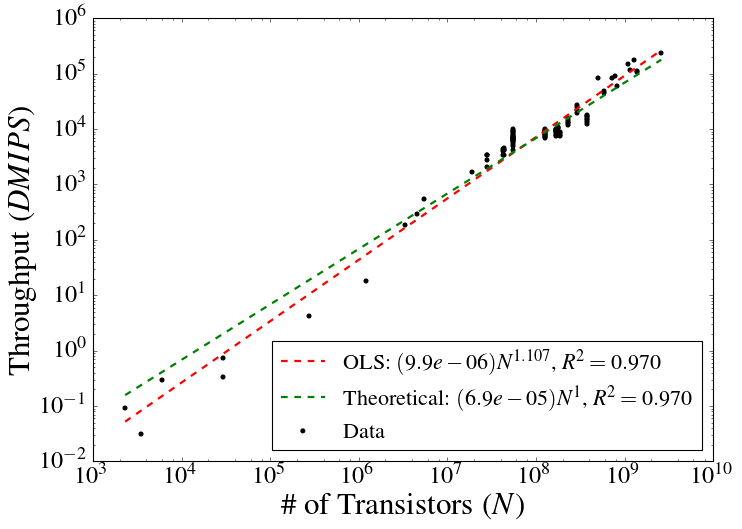

In [39]:
#plt.scatter(data.N,data.DMIPS,marker='.',c=np.log(data.f),cmap=plt.get_cmap('viridis'),edgecolor='face',s=75)
plt.scatter(data.N,data.DMIPS,marker='.',c='k',edgecolor='face',s=50,label='Data')

xfit = [data.N.min(),data.N.max()]
yfit = [np.exp(model.params['constant'])*xfit[0]**model.params['logN'],
        np.exp(model.params['constant'])*xfit[1]**model.params['logN']]
plt.plot(xfit,yfit,'r--',label='OLS: $(%1.1e) N^{%1.3f}$, $R^2=%1.3f$'%(np.exp(model.params['constant']),model.params['logN'],model.rsquared))

xfit = [data.N.min(),data.N.max()]
yfit = [np.exp(intercept1)*xfit[0],
        np.exp(intercept1)*xfit[1]]
plt.plot(xfit,yfit,'g--',label='Theoretical: $(%1.1e) N^1$, $R^2=%1.3f$'%(np.exp(intercept1),Rsquare1))


#xfit = [data.N.min(),data.N.max()]
#yfit = [np.exp(rma_model.intercept)*xfit[0]**rma_model.slope,
#        np.exp(rma_model.intercept)*xfit[1]**rma_model.slope]
#plt.plot(xfit,yfit,'b:',label='RMA: $%1.3f N^{%1.3f}$, $R^2=%1.3f$'%(np.exp(rma_model.intercept),rma_model.slope,rma_model.RSquare))

plt.xscale('log')
plt.yscale('log')
#plt.xlim(10**-3,10**3)
#plt.ylim(10**-2,10**5)
plt.legend(loc='lower right',fontsize=20,frameon=True)
plt.xlabel('\# of Transistors ($N$)')
plt.ylabel('Throughput ($DMIPS$)')

In [ ]:
model = sm.GLS(np.log(data.DMIPS),data[['logNf','constant']]).fit()
model.summary()

In [ ]:
rma_model = RMA.RMARegression(data.logNf,np.log(data.DMIPS))
rma_model

In [ ]:
#plt.scatter(data.N,data.DMIPS,marker='.',c=np.log(data.f),cmap=plt.get_cmap('viridis'),edgecolor='face',s=75)
plt.scatter(data.N*data.f,data.DMIPS,marker='.',c='k',edgecolor='face',s=50,label='Data')

xfit = [(data.N*data.f).min(),(data.N*data.f).max()]
yfit = [np.exp(model.params['constant'])*xfit[0]**model.params['logNf'],
        np.exp(model.params['constant'])*xfit[1]**model.params['logNf']]
plt.plot(xfit,yfit,'r--',label='OLS: $%1.3f N^{%1.3f}$, $R^2=%1.3f$'%(np.exp(model.params['constant']),model.params['logNf'],model.rsquared))

xfit = [(data.N*data.f).min(),(data.N*data.f).max()]
yfit = [np.exp(rma_model.intercept)*xfit[0]**rma_model.slope,
        np.exp(rma_model.intercept)*xfit[1]**rma_model.slope]
plt.plot(xfit,yfit,'b:',label='RMA: $%1.3f N^{%1.3f}$, $R^2=%1.3f$'%(np.exp(rma_model.intercept),rma_model.slope,rma_model.RSquare))

plt.xscale('log')
plt.yscale('log')
#plt.xlim(10**-3,10**3)
#plt.ylim(10**-2,10**5)
plt.legend(loc='lower right',fontsize=20,frameon=True)
plt.xlabel('\# of Transistors $\\times$ freq. ($N \\times f$)')
plt.ylabel('Throughput ($DMIPS$)')